In [16]:
# Implementation of *Classification of MNIST dataset using MLP*

import torch
from torchvision import datasets, transforms

# Define a transform to convert data to tensor and min-max normalization
min_val = 0  # Minimum pixel value
max_val = 255  # Maximum pixel value

transform = transforms.Compose([
    transforms.ToTensor(), # convert data to tensor
    transforms.Lambda(lambda x: x * (max_val - min_val) / 255 + min_val) # Min-max normalization between 0 , 1
])

# load train and test data
train_data = datasets.MNIST('data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('data', train=False, download=True, transform=transform)

# size and number of train and test data
print("size of train data:", train_data.data.shape)
print("number of train data:", len(train_data))
print("\nsize of test data:", test_data.data.shape)
print("number of test data:", len(test_data))

size of train data: torch.Size([60000, 28, 28])
number of train data: 60000

size of test data: torch.Size([10000, 28, 28])
number of test data: 10000


sample of test data:


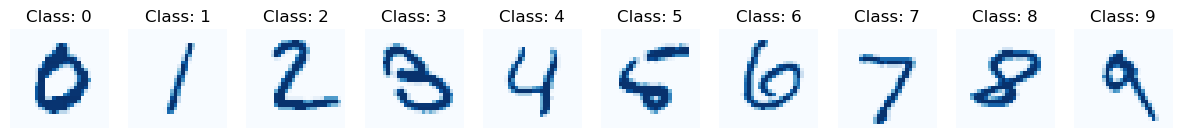

sample of train data:


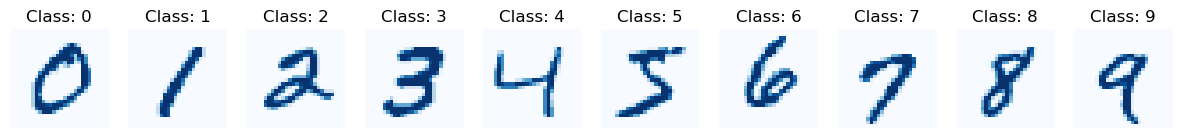

In [43]:
import matplotlib.pyplot as plt
import numpy as np
    
# function to show a sample of each class
def show_samples_per_class(data, labels):

    # Group the test data by class
    grouped_data = [[] for _ in range(10)]  # Create a list for each class
    for img, label in data:
        grouped_data[label].append(img)
    
    unique_labels = np.unique(labels)
    # Determine the characteristics of the plot
    fig, axs = plt.subplots(1, len(unique_labels), figsize=(15, 5))
    # create plot
    for i, label in enumerate(unique_labels):
        sample = grouped_data[i][0].squeeze()
        axs[i].imshow(sample, cmap='Blues')
        axs[i].set_title(f'Class: {label}')
        axs[i].axis('off')
    
    plt.show()

# labels of data
test_labels = test_data.targets
train_labels = train_data.targets

# call functions to show a sample of each class
print('sample of test data:')
show_samples_per_class(test_data, test_labels)
print('sample of train data:')
show_samples_per_class(train_data, train_labels)

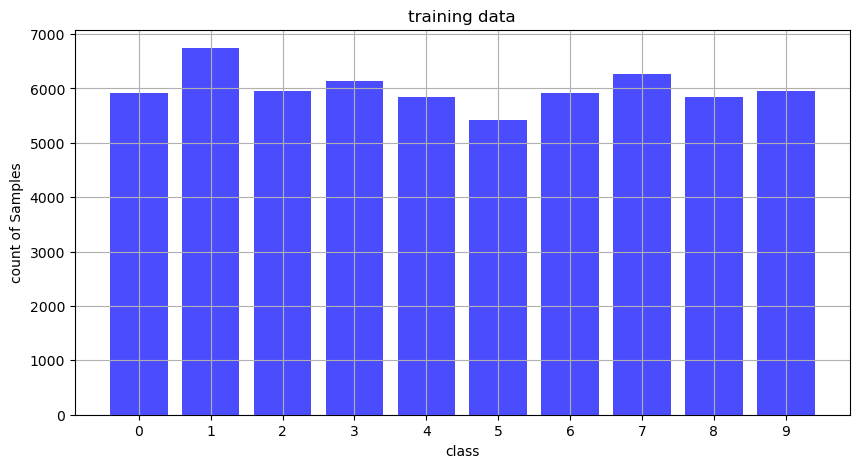

In [18]:
import matplotlib.pyplot as plt

# Determine the number of bins for the histogram
num_bins = 10

# Group the training and test data by class
train_class_counts = torch.zeros(10, dtype=torch.int32)

for _, label in train_data:
    train_class_counts[label] += 1

# Display a histogram for the training data
plt.figure(figsize=(10, 5))
plt.bar(range(num_bins), train_class_counts, color='blue', alpha=0.7)
plt.xlabel('class')
plt.ylabel('count of Samples')
plt.title('training data')
plt.xticks(range(num_bins))
plt.grid(True)
plt.show()


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define a Multi-Layer Perceptron (MLP) model with two hidden layers
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the MLP model
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)



In [27]:
# Calculate the total number of weight updates
batch_size = 200
#total_samples = len(train_data)
total_samples = 12000
updates_per_epoch = total_samples // batch_size
total_updates = updates_per_epoch * 5
print(f'Total number of weight updates after 5 epochs: {total_updates}')

Total number of weight updates after 5 epochs: 300


In [38]:
# define function to culculate test accuracy and loss
def test_model(model, criterion, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #total test loss
            test_loss += loss.item()

            # Calculate test accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    model.train()
    return 100 * correct / total, test_loss / len(test_loader)

# load train and test data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=200, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=200, shuffle=True)

# Train the model with calculation of loss, backpropagation, and weight updates
for epoch in range(5):  # 5 epochs
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # total loss
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Calculate test accuracy and loss for each epoch
    test_accuracy, test_loss = test_model(model, criterion, test_loader)

    # print loss, test Accuracy, test Loss
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Test Accuracy: {test_accuracy}%, Test Loss: {test_loss}')


Epoch 1, Loss: 0.23771203634639582, Test Accuracy: 93.52%, Test Loss: 0.22993444114923478
Epoch 2, Loss: 0.23325600164632002, Test Accuracy: 93.72%, Test Loss: 0.22633589833974838
Epoch 3, Loss: 0.2289472803970178, Test Accuracy: 93.75%, Test Loss: 0.22218706965446472
Epoch 4, Loss: 0.22483509664734205, Test Accuracy: 93.77%, Test Loss: 0.21948059290647506
Epoch 5, Loss: 0.22050775850812593, Test Accuracy: 93.88%, Test Loss: 0.21581748217344285
